In [ ]:
# https://github.com/quant4junior/algoTrade

In [34]:
#1. 로딩
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [3]:
print(type(df.index))
print(type(df.index[0]))
type(df['Date'][0])

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


str

In [4]:
for col in df.columns:
    series = df[col]
print(type(series[0]))
print(series)

<class 'numpy.float64'>
0       117258400.0
1        43971200.0
2        26432000.0
3        21610400.0
4        18362400.0
           ...     
9710     26551000.0
9711     21124200.0
9712     21514000.0
9713     47735300.0
9714      9025362.0
Name: Volume, Length: 9715, dtype: float64


In [35]:
#2. index를 설정하여 로딩
df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [6]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [36]:
#3. 결측치 확인/제거
import numpy as np 

print(df.isna().sum())
print()
print(df.isin([np.nan, np.inf, -np.inf]).any(1))

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Date
1980-12-12    False
1980-12-15    False
1980-12-16    False
1980-12-17    False
1980-12-18    False
              ...  
2019-06-18    False
2019-06-19    False
2019-06-20    False
2019-06-21    False
2019-06-24    False
Length: 9715, dtype: bool


In [37]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df = df.dropna(axis=0) #0:row, 1:col
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#4. 슬라이싱/인덱싱/서브셋

In [15]:
#열단위 출력
print(df['Open'].head())
print()
print(df[['Open','Close']].head()) # 2개 이상은 array로 넘거야함?

Date
1980-12-12    0.513393
1980-12-15    0.488839
1980-12-16    0.453125
1980-12-17    0.462054
1980-12-18    0.475446
Name: Open, dtype: float64

                Open     Close
Date                          
1980-12-12  0.513393  0.513393
1980-12-15  0.488839  0.486607
1980-12-16  0.453125  0.450893
1980-12-17  0.462054  0.462054
1980-12-18  0.475446  0.475446


In [16]:
#row 단위, index조건 출력
print(df[0:3])
print()
print(df['2018-10-01':'2018-10-05'])

                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.410525  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.389106   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.360548   26432000.0

                  Open        High  ...   Adj Close      Volume
Date                                ...                        
2018-10-01  227.949997  229.419998  ...  224.637604  23600800.0
2018-10-02  227.250000  230.000000  ...  226.634293  24788200.0
2018-10-03  230.050003  233.470001  ...  229.392090  28654800.0
2018-10-04  230.779999  232.350006  ...  225.359177  32042000.0
2018-10-05  227.960007  228.410004  ...  221.701859  33580500.0

[5 rows x 6 columns]


In [18]:
#loc, iloc
print(df.loc['2018-10-01'])
print()
print(df.iloc[0])

Open         2.279500e+02
High         2.294200e+02
Low          2.263500e+02
Close        2.272600e+02
Adj Close    2.246376e+02
Volume       2.360080e+07
Name: 2018-10-01 00:00:00, dtype: float64

Open         5.133930e-01
High         5.156250e-01
Low          5.133930e-01
Close        5.133930e-01
Adj Close    4.105250e-01
Volume       1.172584e+08
Name: 1980-12-12 00:00:00, dtype: float64


In [21]:
print(df.loc['2018-10-01':'2018-10-05', ['Open','Close']])
print()
print(df.iloc[8000:8005, [0,1]])

                  Open       Close
Date                              
2018-10-01  227.949997  227.259995
2018-10-02  227.250000  229.279999
2018-10-03  230.050003  232.070007
2018-10-04  230.779999  227.990005
2018-10-05  227.960007  224.289993

                 Open       High
Date                            
2012-08-28  96.425713  96.585716
2012-08-29  96.464287  96.809998
2012-08-30  95.805717  95.935715
2012-08-31  95.321426  95.514282
2012-09-04  95.108574  96.448570


In [ ]:
# 5. 금융 시계열 분석에 유용한 pandas 함수

In [22]:
#shift: 원하는 시간 주기 간격만큼 index를  shift가능
df['Close_lag1'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag1
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054


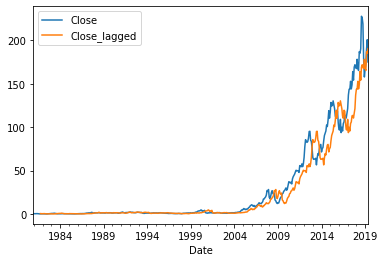

In [23]:
df['Close'].asfreq('M',method='ffill').plot(legend=True)
shifted = df['Close'].asfreq('M',method='ffill').shift(10).plot(legend = True)
shifted.legend(['Close','Close_lagged'])

                Open      High       Low  ...       Volume  Close_lag1  pct_change
Date                                      ...                                     
1980-12-12  0.513393  0.515625  0.513393  ...  117258400.0         NaN         NaN
1980-12-15  0.488839  0.488839  0.486607  ...   43971200.0    0.513393   -0.052174
1980-12-16  0.453125  0.453125  0.450893  ...   26432000.0    0.486607   -0.073394
1980-12-17  0.462054  0.464286  0.462054  ...   21610400.0    0.450893    0.024753
1980-12-18  0.475446  0.477679  0.475446  ...   18362400.0    0.462054    0.028984
1980-12-19  0.504464  0.506696  0.504464  ...   12157600.0    0.475446    0.061033
1980-12-22  0.529018  0.531250  0.529018  ...    9340800.0    0.504464    0.048673

[7 rows x 8 columns]


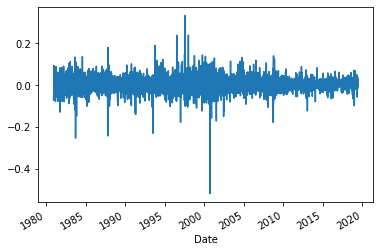

In [27]:
#percent change : 현재값과 이전값의 변화량을 백분위로 표현
df['pct_change'] = df['Close'].pct_change()
print(df.head(7))
df['pct_change'].plot()

In [61]:
#rolling: 이동 평균선
df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=['Date'])
df.head()

df = df.loc['2018-01-01':'2018-12-31']
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_10,MA_20
Date,,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.339050,25555900.0,NaN,NaN,NaN
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.309738,29517900.0,NaN,NaN,NaN
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.091522,22434600.0,NaN,NaN,NaN
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.016678,23660000.0,NaN,NaN,NaN
2018-01-08,174.350006,175.610001,173.929993,174.350006,170.381485,20567800.0,173.373999,NaN,NaN
2018-01-09,174.550003,175.059998,173.410004,174.330002,170.361954,21584000.0,173.788001,NaN,NaN
2018-01-10,173.160004,174.300003,173.000000,174.289993,170.322845,23959900.0,174.200000,NaN,NaN
2018-01-11,174.589996,175.490005,174.490005,175.279999,171.290329,18667700.0,174.650000,NaN,NaN
2018-01-12,176.179993,177.360001,175.649994,177.089996,173.059113,25226000.0,175.067999,NaN,NaN


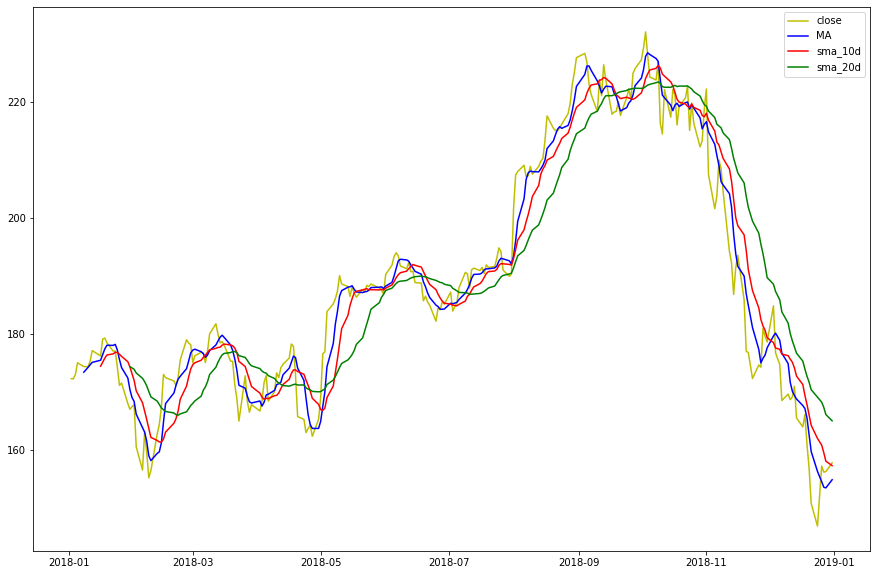

In [62]:
#https://rfriend.tistory.com/502
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(df.index, df.Close, 'y-', label='close')
plt.plot(df.index, df.MA_5, 'b-', label='MA')
plt.plot(df.index, df.MA_10, 'r-', label='sma_10d')
plt.plot(df.index, df.MA_20, 'g-', label='sma_20d')
plt.legend()
plt.show()